In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

from sklearn import svm
from sklearn.svm import SVC
from collections import Counter
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import KMeansSMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

Data Collection and Analysis

PIMA Diabetes Dataset

In [ ]:
df = pd.read_csv("/content/diabetes.csv")

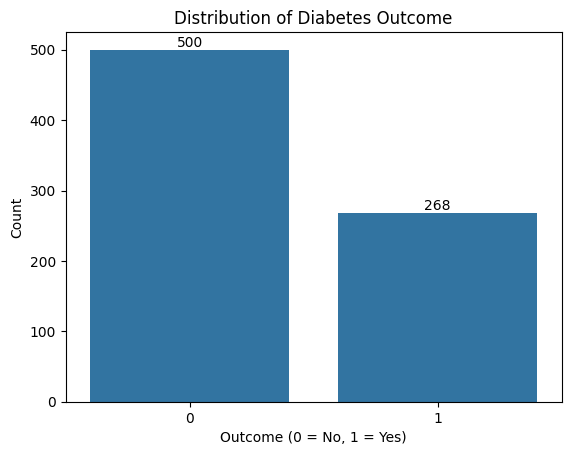

In [ ]:
# Plot the outcome distribution
sns.countplot(x='Outcome', data=df)
plt.title('Distribution of Diabetes Outcome')
plt.xlabel('Outcome (0 = No, 1 = Yes)')
plt.ylabel('Count')
for p in plt.gca().patches:
  plt.text(p.get_x() + p.get_width() / 2,  # X-coordinate: center of the bar
    p.get_height(),                # Y-coordinate: top of the bar
    int(p.get_height()),           # Text to display (integer count)
    ha='center',                   # Horizontal alignment
    va='bottom')                   # Vertical alignment

plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.shape

(768, 9)

In [ ]:
# getting the statistical measures of the data
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
df['Outcome'].value_counts()

,count
Outcome,
0,500
1,268


0 --> Non-Diabetic

1 --> Diabetic

Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik ')

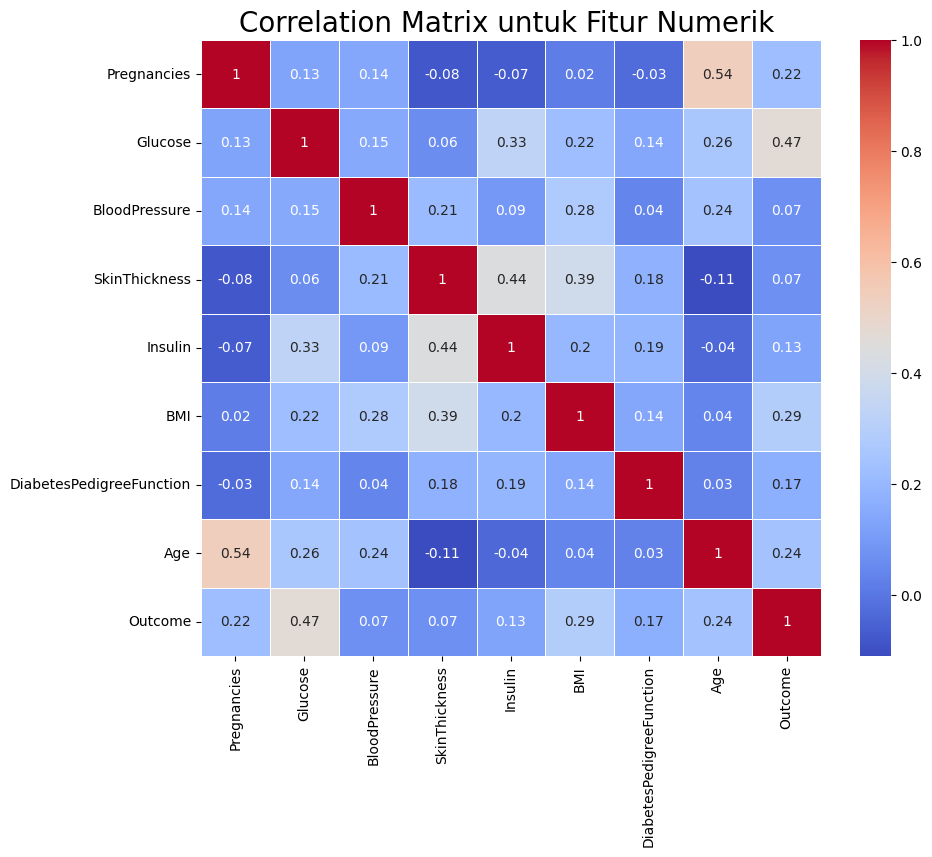

In [ ]:
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr().round(2)

# Untuk menge-print nilai di dalam kotak, gunakan parameter anot=True
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)

Train Test Split

In [ ]:
#X = df.drop(columns="Outcome", axis=1)
X = df.drop(columns=["Outcome","BloodPressure","SkinThickness"], axis=1) #Multivariate
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=2)
print(X.shape, X_train.shape, X_test.shape, y.shape, y_train.shape, y_test.shape)

(768, 6) (614, 6) (154, 6) (768,) (614,) (154,)


Data Standardization

In [ ]:
# Memeriksa distribusi kelas sebelum KMeans-SMOTE
print('Distribusi kelas sebelum KMeans-SMOTE:', Counter(y_train))

# Terapkan KMeans-SMOTE
kmeans_smote = KMeansSMOTE(random_state=42, kmeans_estimator=2, n_jobs=-1)  # Menentukan 2 kluster
X_resampled, y_resampled = kmeans_smote.fit_resample(X_train, y_train)

# Memeriksa distribusi kelas setelah oversampling
print('Distribusi kelas setelah KMeans-SMOTE:', Counter(y_resampled))

Distribusi kelas sebelum KMeans-SMOTE: Counter({0: 400, 1: 214})
Distribusi kelas setelah KMeans-SMOTE: Counter({1: 400, 0: 400})


In [ ]:
df_train = pd.DataFrame(X_train)
df_train['Outcome'] = y_train

df_train[df_train['Outcome'] == 1].tail(250)

,Pregnancies,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
619,0,119,0,32.4,0.141,24,1
13,1,189,846,30.1,0.398,59,1
476,2,105,191,33.7,0.711,29,1
45,0,180,0,42.0,1.893,25,1
292,2,128,182,43.3,1.224,31,1
...,...,...,...,...,...,...,...
648,11,136,130,28.3,0.260,42,1
427,1,181,180,34.1,0.328,38,1
614,11,138,144,36.1,0.557,50,1
303,5,115,0,52.9,0.209,28,1


In [ ]:
# get the resampled data
df_resampled = pd.DataFrame(X_resampled)
df_resampled['Outcome'] = y_resampled

df_resampled[df_resampled['Outcome'] == 1].tail(250)

,Pregnancies,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
445,8,188,0,47.900000,0.137000,43,1
446,0,113,0,33.300000,0.278000,23,1
450,1,144,180,46.100000,0.335000,46,1
454,8,151,210,42.900000,0.516000,36,1
455,4,117,0,29.700000,0.380000,30,1
...,...,...,...,...,...,...,...
795,5,189,144,24.767155,0.218605,50,1
796,0,143,179,45.891916,0.470463,45,1
797,5,109,204,37.049611,1.291439,54,1
798,10,154,150,33.245335,1.342395,51,1


In [ ]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_resampled = scaler.fit_transform(X_resampled)
X_test = scaler.transform(X_test)

In [ ]:
# plt.figure(figsize=(14, 6))

# plt.subplot(1, 2, 1)
# sns.scatterplot(x=X_resampled[:, 1], y=X_resampled[:, 5], hue=y_resampled, palette='coolwarm', s=50)
# plt.title("Scatter Plot of Training Data (Glucose vs BMI)")
# plt.xlabel("Glucose Level")
# plt.ylabel("BMI")
# plt.grid(True)

# plt.subplot(1, 2, 2)
# sns.scatterplot(x=X_train[:, 1], y=X_train[:, 5], hue=y_train, palette='coolwarm', s=50)
# plt.title("Scatter Plot of Training Data (Glucose vs BMI)")
# plt.xlabel("Glucose Level")
# plt.ylabel("BMI")
# plt.grid(True)

# plt.tight_layout()
# plt.show()

## SVM

In [ ]:
# training the support vector machine classifier
classifier = svm.SVC(kernel='rbf')
classifier.fit(X_train, y_train)

SVC()

In [ ]:
classifier_smote = svm.SVC(kernel='rbf')
classifier_smote.fit(X_resampled, y_resampled)

SVC()

In [ ]:
# accuracy score on the training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, y_train)
print("Training data accurary: ", training_data_accuracy)

# accuracy score on the training data after smote
X_train_prediction_smote = classifier_smote.predict(X_resampled)
training_data_accuracy_smote = accuracy_score(X_train_prediction_smote, y_resampled)
print("Training data accurary after smote: ", training_data_accuracy_smote)

Training data accurary:  0.8322475570032574
Training data accurary after smote:  0.84625


In [ ]:
# accuracy score on the test data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, y_test)
print("Test data accuracy: ", test_data_accuracy)

# accuracy score on the testing data after smote
X_test_prediction_smote = classifier_smote.predict(X_test)
test_data_accuracy_smote = accuracy_score(X_test_prediction_smote, y_test)
print("Test data accuracy after smote: ", test_data_accuracy_smote)

Test data accuracy:  0.7207792207792207
Test data accuracy after smote:  0.7662337662337663


## Logistic Regression

In [ ]:
cls_lr = LogisticRegression(max_iter=1000, random_state=0, solver='lbfgs', class_weight='balanced')
cls_lr = cls_lr.fit(X_train, y_train)

cls_lr_smote = LogisticRegression(max_iter=1000, random_state=0, solver='lbfgs', class_weight='balanced')
cls_lr_smote.fit(X_resampled, y_resampled)

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=0)

In [ ]:
# accuracy score on the training data
X_train_prediction_lr = (cls_lr.predict_proba(X_train)[:, 1] >= 0.5).astype(int)  # Convert probabilities to 0 or 1
training_data_accuracy_lr = accuracy_score(X_train_prediction_lr, y_train)
print("Training data accuracy: ", training_data_accuracy_lr)


X_train_prediction_lr_smote = (cls_lr.predict_proba(X_resampled)[:, 1] >= 0.5).astype(int)
training_data_accuracy_lr_smote = accuracy_score(X_train_prediction_lr_smote, y_resampled)
print("Training data accurary after smote: ", training_data_accuracy_lr_smote)

Training data accuracy:  0.762214983713355
Training data accurary after smote:  0.78375


In [ ]:
# accuracy score on the test data
X_test_prediction_lr = (cls_lr.predict_proba(X_test)[:, 1] >= 0.5).astype(int)
test_data_accuracy_lr = accuracy_score(X_test_prediction_lr, y_test)
print("Test data accuracy: ", test_data_accuracy_lr)

X_test_prediction_lr_smote = (cls_lr_smote.predict_proba(X_test)[:, 1] >= 0.5).astype(int)
test_data_accuracy_lr_smote = accuracy_score(X_test_prediction_lr_smote, y_test)
print("Test data accuracy after smote: ", test_data_accuracy_lr_smote)

Test data accuracy:  0.7597402597402597
Test data accuracy after smote:  0.7662337662337663


## NAIVE BAYES

In [ ]:
cls_nb = GaussianNB()
cls_nb = cls_nb.fit(X_train, y_train)

In [ ]:
cls_nb_smote = GaussianNB()
cls_nb_smote.fit(X_resampled, y_resampled)

GaussianNB()

In [ ]:
# Apply a custom threshold (e.g., 0.4 instead of 0.5 for classifying as 1)
threshold = 0.4

# accuracy score on the training data
X_train_prediction_nb = cls_nb.predict_proba(X_train)
X_train_prediction_nb = (X_train_prediction_nb[:, 1] >= threshold).astype(int)
training_data_accuracy_nb = accuracy_score(X_train_prediction_nb, y_train)
print("Training data accurary: ", training_data_accuracy_nb)

X_train_prediction_nb_smote = cls_nb_smote.predict_proba(X_resampled)
X_train_prediction_nb_smote = (X_train_prediction_nb_smote[:, 1] >= threshold).astype(int)
training_data_accuracy_nb_smote = accuracy_score(X_train_prediction_nb_smote, y_resampled)
print("Training data accurary after smote: ", training_data_accuracy_nb_smote)

Training data accurary:  0.747557003257329
Training data accurary after smote:  0.7925


In [ ]:
# accuracy score on the test data
X_test_prediction_nb = cls_nb.predict_proba(X_test)
X_test_prediction_nb = (X_test_prediction_nb[:, 1] >= threshold).astype(int)
test_data_accuracy_nb = accuracy_score(X_test_prediction_nb, y_test)
print("Test data accuracy: ", test_data_accuracy_nb)

X_test_prediction_nb_smote = cls_nb_smote.predict_proba(X_test)
X_test_prediction_nb_smote = (X_test_prediction_nb_smote[:, 1] >= threshold).astype(int)
test_data_accuracy_nb_smote = accuracy_score(X_test_prediction_nb_smote, y_test)
print("Test data accuracy after smote: ", test_data_accuracy_nb_smote)

Test data accuracy:  0.7662337662337663
Test data accuracy after smote:  0.7922077922077922


## KNN

In [ ]:
cls_knn = KNeighborsClassifier(n_neighbors=5, weights='distance')
cls_knn = cls_knn.fit(X_train, y_train)

cls_knn_smote = KNeighborsClassifier(n_neighbors=5, weights='distance')
cls_knn_smote.fit(X_resampled, y_resampled)

KNeighborsClassifier(weights='distance')

In [ ]:
# accuracy score on the training data
X_train_prediction_knn = cls_knn.predict_proba(X_train)
X_train_prediction_knn = (X_train_prediction_knn[:, 1] >= threshold).astype(int)
training_data_accuracy_knn = accuracy_score(X_train_prediction_knn, y_train)
print("Training data accuracy: ", training_data_accuracy_knn)

X_train_prediction_knn_smote = cls_knn_smote.predict_proba(X_resampled)
X_train_prediction_knn_smote = (X_train_prediction_knn_smote[:, 1] >= threshold).astype(int)
training_data_accuracy_knn_smote = accuracy_score(X_train_prediction_knn_smote, y_resampled)
print("Training data accuracy after smote: ", training_data_accuracy_knn_smote)

# accuracy score on the test data
X_test_prediction_knn = cls_knn.predict_proba(X_test)
X_test_prediction_knn = (X_test_prediction_knn[:, 1] >= threshold).astype(int)
test_data_accuracy_knn = accuracy_score(X_test_prediction_knn, y_test)
print("Test data accuracy: ", test_data_accuracy_knn)

X_test_prediction_knn_smote = cls_knn_smote.predict_proba(X_test)
X_test_prediction_knn_smote = (X_test_prediction_knn_smote[:, 1] >= threshold).astype(int)
test_data_accuracy_knn_smote = accuracy_score(X_test_prediction_knn_smote, y_test)
print("Test data accuracy after smote: ", test_data_accuracy_knn_smote)

Training data accuracy:  1.0
Training data accuracy after smote:  1.0
Test data accuracy:  0.6623376623376623
Test data accuracy after smote:  0.6948051948051948


## PERFORMA PAKAI STANDARISASI

In [ ]:
list_of_perfomance = [ 'Logistic Regression', 'Naive Bayes', 'KNN']
list_of_training_accuracy_value = [training_data_accuracy_lr, training_data_accuracy_lr_smote, training_data_accuracy_nb, training_data_accuracy_nb_smote, training_data_accuracy_knn, training_data_accuracy_knn_smote]
list_of_testing_accuracy_value = [test_data_accuracy_lr, test_data_accuracy_lr_smote, test_data_accuracy_nb, test_data_accuracy_nb_smote, test_data_accuracy_knn, test_data_accuracy_knn_smote]

# Print performance for each model
for i in range(len(list_of_perfomance)):
    # yang baris kedua adalah untuk setelah SMOTE
    start_index = i * 2
    end_index = start_index + 2

    training_accuracy = list_of_training_accuracy_value[start_index:end_index]
    testing_accuracy = list_of_testing_accuracy_value[start_index:end_index]

    print(f"{list_of_perfomance[i]}:")
    for train_acc, test_acc in zip(training_accuracy, testing_accuracy):
        print(f"  Akurasi Training: {train_acc}, Akurasi Testing: {test_acc}")

Logistic Regression:
  Akurasi Training: 0.762214983713355, Akurasi Testing: 0.7597402597402597
  Akurasi Training: 0.78375, Akurasi Testing: 0.7662337662337663
Naive Bayes:
  Akurasi Training: 0.747557003257329, Akurasi Testing: 0.7662337662337663
  Akurasi Training: 0.7925, Akurasi Testing: 0.7922077922077922
KNN:
  Akurasi Training: 1.0, Akurasi Testing: 0.6623376623376623
  Akurasi Training: 1.0, Akurasi Testing: 0.6948051948051948


## Confussion Matrix

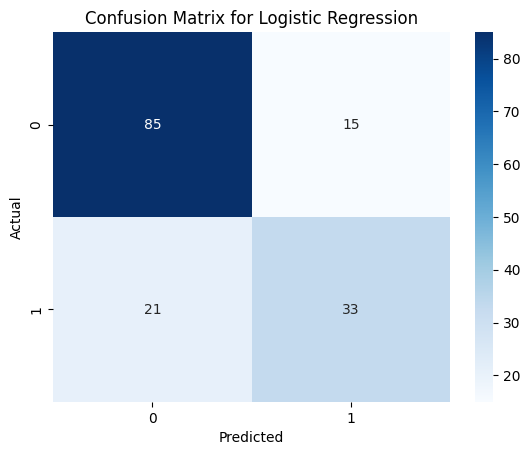

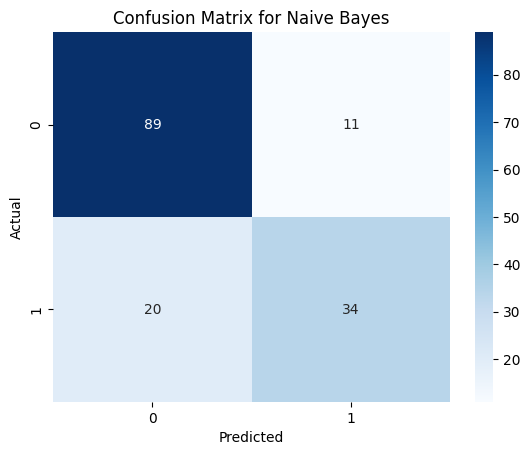

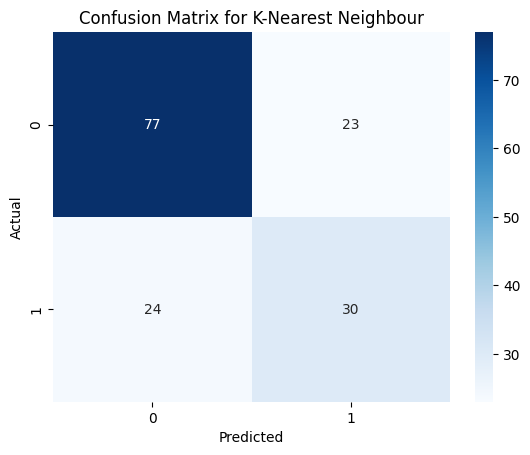

In [ ]:
from sklearn.metrics import confusion_matrix

# Confussion Matrix Logistic Regression
y_pred = cls_lr_smote.predict(X_test)

# accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy of Logistic Regression model:", accuracy)
# print("Classification Report:\n", classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
# print("Confusion Matrix:\n", conf_matrix)

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Confussion Matrix Naive Bayes
y_pred = cls_nb_smote.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Naive Bayes')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Confussion Matrix K-Nearest Neigbour
y_pred = cls_knn_smote.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for K-Nearest Neighbour')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## PERCOBAAN PREDIKSI

In [ ]:
#new_input_data = (4,110,92,0,0,37.6,0.191,30)

new_input_data = (4,0,37.6,0.191,30,0) #Multivariate

input_data_array = np.asarray(new_input_data)

#reshape array
data_array_reshaped = input_data_array.reshape(1, -1)
print("reshaped array: ", data_array_reshaped)

# standardize the input data
std_data = scaler.transform(data_array_reshaped)
print("\nStandard Input: ", std_data)

prediction = cls_knn.predict(std_data)
print("The prediction is: ", prediction)

if(prediction[0] == 0):
  print("The person is not diabetic")
else:
  print("The person is diabetic")

reshaped array:  [[ 4.     0.    37.6    0.191 30.     0.   ]]

Standard Input:  [[ 6.18329992e-02 -3.85299760e+00 -6.03943147e-01 -4.34694709e+00
   8.52286134e+01 -2.93130991e+00]]
The prediction is:  [1]
The person is diabetic


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import accuracy_score
# from sklearn.utils import class_weight

# # Menghitung bobot kelas
# weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
# class_weights = {0: weights[0], 1: weights[1]}

# # Logistic Regression dengan bobot kelas
# cls_log_reg = LogisticRegression(class_weight=class_weights, random_state=2)
# cls_log_reg.fit(X_train, y_train)

# # Evaluasi model
# X_train_prediction_log_reg = cls_log_reg.predict(X_train)
# training_data_accuracy_log_reg = accuracy_score(X_train_prediction_log_reg, y_train)
# print("Training data accuracy: ", training_data_accuracy_log_reg)

# X_test_prediction_log_reg = cls_log_reg.predict(X_test)
# test_data_accuracy_log_reg = accuracy_score(X_test_prediction_log_reg, y_test)
# print("Test data accuracy: ", test_data_accuracy_log_reg)



'''
NB dan KNN tdk bisa csl karena tdk ada parameternya. utk LR bisa
'''


'\nNB dan KNN tdk bisa csl karena tdk ada parameternya. utk LR bisa\n'